***1- Data Management.*** <br>
https://dvc.org/doc/start
***

1- Initializee the dvc repository. <br>
2- commit what we did so far. <br>
3- download the data with dvc get wrapper. <br>
4- add data to dvc tracking. this line will create a file with same name as our data with .dvc format and also a .gitignore file. <br>
5- add the tracking data and git placeholder with git command. <br>
6- create the remote locally or online. add the remote as a dvc remote. <br>
7- push the data using dvc order and follow by a git commit to save the version control. <br>
8- change between different version of the model and data. <br>
9- just use these codes to add and commit new modified datasets. <br>

In [2]:
! dvc init


Initialized DVC repository.

You can now commit the changes to git.

+---------------------------------------------------------------------+
|                                                                     |
|        DVC has enabled anonymous aggregate usage analytics.         |
|     Read the analytics documentation (and how to opt-out) here:     |
|             <https://dvc.org/doc/user-guide/analytics>              |
|                                                                     |
+---------------------------------------------------------------------+

What's next?
------------
- Check out the documentation: <https://dvc.org/doc>
- Get help and share ideas: <https://dvc.org/chat>
- Star us on GitHub: <https://github.com/iterative/dvc>


In [4]:
! git status

On branch master
Your branch is up to date with 'origin/master'.

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	new file:   .dvc/.gitignore
	new file:   .dvc/config
	new file:   .dvcignore

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	MLOPs.ipynb



In [5]:
! git commit -m "Initialize DVC"
# download the data and save it in a new folder
! dvc get https://github.com/iterative/dataset-registry \
          get-started/data.xml -o data/data.xml


[master d9730c7] Initialize DVC
 3 files changed, 6 insertions(+)
 create mode 100644 .dvc/.gitignore
 create mode 100644 .dvc/config
 create mode 100644 .dvcignore
                                                                            

In [6]:
! dvc add data/data.xml

⠋ Checking graph                                       core>
Adding...                                                                       
!
                                                                                
!
  0% Checking cache in '/home/ali/NPEMF/.dvc/cache/files/md5'| |0/? [00:00<?,   
                                                                                
!
  0%|          |Adding data/data.xml to cache         0/1 [00:00<?,     ?file/s]
                                                                                
!
  0%|          |Checking out /home/ali/NPEMF/data/data0/1 [00:00<?,    ?files/s]
100% Adding...|████████████████████████████████████████|1/1 [00:00, 13.18file/s]

To track the changes with git, run:

	git add data/.gitignore data/data.xml.dvc

To enable auto staging, run:

	dvc config core.autostage true


In [7]:
! git add data/data.xml.dvc data/.gitignore
! git commit -m "Add raw data"

[master 3560319] Add raw data
 2 files changed, 6 insertions(+)
 create mode 100644 data/.gitignore
 create mode 100644 data/data.xml.dvc


In [8]:
# local storage
! mkdir /tmp/dvcstore
! dvc remote add -d myremote /tmp/dvcstore

# remote storage
# ! dvc remote add -d storage s3://mybucket/dvcstore

Setting 'myremote' as a default remote.


In [10]:
! dvc push
# ! dvc pull
! git commit data/data.xml.dvc -m "Dataset updates"
! git push

Pushing
!
  0% Checking cache in '/tmp/dvcstore/files/md5'|    |0/? [00:00<?,    ?files/s]
Pushing                                                                         
Everything is up to date.
On branch master
Your branch is ahead of 'origin/master' by 2 commits.
  (use "git push" to publish your local commits)

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   .dvc/config

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	MLOPs.ipynb

no changes added to commit (use "git add" and/or "git commit -a")
Enter passphrase for key '/home/ali/.ssh/id_ed25519': 


In [ ]:
# change to an specific version
! git checkout 72de82ee151cae08636f90435be6709a8632ac96 # HEAD~1 data/data.xml.dvc # this line will checkout one of the git commits.
! dvc checkout # and then dvc checkout makes sure that the data is correctly checked out.

# After checking the data, to checkout to the last version of the data. use the following codes.
! git checkout main  # or whatever branch you were on
! dvc checkout  # to restore the latest version of the data

In [ ]:
# Use the following after data modification.
! dvc add data.xml
! git add data.xml.dvc .gitignore
! git commit -m 'test the data change'
! dvc push
! git push

***2- Data Quality Assurance:***
***
**2-1- Handling Missing Data and Time Zone Alignment:**<br>
Imputation: We use mean, median, or forward filling based on historical data for numerical fields like SpotPriceDKK or SpotPurchase. <br>
Data Exclusion: If certain columns are irrelevant for specific models, they can be excluded from training.
Time Zone Alignment: We standardize all timestamps to DK using Pandas, ensuring consistent data input for the model.

In [1]:
# Importing the data from excel and showing the info about whole data
import pandas as pd

data_path= './data/NordPoolMarket.xlsx'
raw_data= pd.read_excel(data_path)
missing_values= raw_data.isnull()
missing_counts= missing_values.sum() 
row_with_missing_values= raw_data[raw_data.isnull().any(axis=1)]
print('A summary about dataset')
print(raw_data.info())
print('Missing values in the dataset')
print(missing_values)
print('The number of missing values in the dataset')
print(missing_counts)
print('Rows with the missing values')
print(row_with_missing_values)

A summary about dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99354 entries, 0 to 99353
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   HourUTC               99354 non-null  datetime64[ns]
 1   HourDK                99354 non-null  datetime64[ns]
 2   PriceArea             99354 non-null  object        
 3   SpotPurchase          99354 non-null  float64       
 4   SpotSale              99354 non-null  float64       
 5   SpotPriceDKK          99354 non-null  float64       
 6   ElbasAveragePriceDKK  88398 non-null  float64       
 7   ElbasMaxPriceDKK      88398 non-null  float64       
 8   ElbasMinPriceDKK      88398 non-null  float64       
 9   SpotPriceEUR          99354 non-null  float64       
 10  ElbasAveragePriceEUR  88398 non-null  float64       
 11  ElbasMaxPriceEUR      88398 non-null  float64       
 12  ElbasMinPriceEUR      88398 non-null  float64     

In [3]:
raw_data_1= raw_data.drop(columns='HourUTC') # removing UTC time to proceed just with DK time.
# Fill in the missing values using interpolation for elbas datas and mean for others.
raw_data_1['ElbasAveragePriceDKK']= raw_data_1['ElbasAveragePriceDKK'].interpolate(method='linear') 
raw_data_1['ElbasMaxPriceDKK']= raw_data_1['ElbasMaxPriceDKK'].interpolate(method='linear') 
raw_data_1['ElbasMinPriceDKK']= raw_data_1['ElbasMinPriceDKK'].interpolate(method='linear')
raw_data_1['ElbasAveragePriceEUR']= raw_data_1['ElbasAveragePriceEUR'].interpolate(method='linear') 
raw_data_1['ElbasMaxPriceEUR']= raw_data_1['ElbasMaxPriceEUR'].interpolate(method='linear') 
raw_data_1['ElbasMinPriceEUR']= raw_data_1['ElbasMinPriceEUR'].interpolate(method='linear')
raw_data_1['HourDK_unix'] = raw_data_1['HourDK'].astype('int64') // 10**9

print(raw_data_1.isnull().sum())
# We can see that there are still nul cells in the dataframe
raw_data_1= raw_data_1.drop([0,1]) # removing the first 2 rows because they don't have value
print(raw_data_1.isnull().sum())

# Save the modified excel file with modified added to the end.
revised_path= data_path[:-4]+'modified'+'.xlsx'
raw_data_1.to_excel(revised_path, index=False)

HourDK                  0
PriceArea               0
SpotPurchase            0
SpotSale                0
SpotPriceDKK            0
ElbasAveragePriceDKK    2
ElbasMaxPriceDKK        2
ElbasMinPriceDKK        2
SpotPriceEUR            0
ElbasAveragePriceEUR    2
ElbasMaxPriceEUR        2
ElbasMinPriceEUR        2
HourDK_unix             0
dtype: int64
HourDK                  0
PriceArea               0
SpotPurchase            0
SpotSale                0
SpotPriceDKK            0
ElbasAveragePriceDKK    0
ElbasMaxPriceDKK        0
ElbasMinPriceDKK        0
SpotPriceEUR            0
ElbasAveragePriceEUR    0
ElbasMaxPriceEUR        0
ElbasMinPriceEUR        0
HourDK_unix             0
dtype: int64


**2-1- Great Expectation Check:**
***
With Great Expectations, we can define different metrics to be assessed automatically in the pipeline. The pipeline includes the validation of data formats, ensuring the data integrity, and checking the compliance with schema requirements before training the model.



In [5]:
import os
import datetime
import pandas as pd
import great_expectations as gx
import great_expectations.jupyter_ux
from great_expectations.core.expectation_configuration import ExpectationConfiguration
from great_expectations.data_context.types.resource_identifiers import ExpectationSuiteIdentifier
from great_expectations.exceptions import DataContextError


# cwd= os.getcwd()
folder_name= 'gx' # to check if the gx folder exist to run creating folder or not.
if os.path.exists(folder_name) and os.path.isdir(folder_name):
    context = gx.get_context()
else:
    context = gx.get_context()
    context= context.convert_to_file_context()

# Reading the dataset from path
validator= context.sources.pandas_default.read_excel(revised_path)

expectation_suite_name = "Energy Data Analysis"
try:
    suite = context.get_expectation_suite(expectation_suite_name=expectation_suite_name)
    print(f'Loaded ExpectationSuite "{suite.expectation_suite_name}" containing {len(suite.expectations)} expectations.')
except DataContextError:
    suite = context.add_expectation_suite(expectation_suite_name=expectation_suite_name)
    print(f'Created ExpectationSuite "{suite.expectation_suite_name}".')

# Define Expectations
validator.expect_table_columns_to_match_ordered_list(
    column_list=["HourDK", "PriceArea"])
validator.expect_column_values_to_be_of_type("SpotPriceDKK", "float")
validator.expect_column_values_to_be_of_type("HourDK", "datetime64")
validator.expect_column_values_to_be_between(column='SpotPriceDKK', min_value= 0,
                                            max_value=100000)
validator.expect_column_values_to_not_be_null("SpotPriceDKK")
validator.expect_column_values_to_be_unique("HourDK")

validator.expect_column_values_to_be_increasing("HourDK_unix")
validator.expect_column_median_to_be_between("SpotPriceDKK", 20, 500)
validator.expect_column_values_to_be_in_set("PriceArea", ["DK1", "DK2"])


validator.save_expectation_suite(discard_failed_expectations=False)
checkpoint = context.add_or_update_checkpoint(
    name=expectation_suite_name,
    validator=validator)
checkpoint_result = checkpoint.run()
context.view_validation_result(checkpoint_result)
# context.build_data_docs()
# docs_path = context.get_docs_sites_urls()[0]['site_url']
# print(f"Open this URL in your browser to view data docs: {docs_path}")
# context.open_data_docs()

print(context.get_expectation_suite(expectation_suite_name=expectation_suite_name))
context.add_or_update_expectation_suite(expectation_suite=suite)

suite_identifier = ExpectationSuiteIdentifier(expectation_suite_name=expectation_suite_name)
context.build_data_docs(resource_identifiers=[suite_identifier])
docs_path = context.get_docs_sites_urls()[0]['site_url']
print(f"Open this URL in your browser to view data docs: {docs_path[:7]+'wsl.localhost/Debian'+docs_path[7:]}")
context.open_data_docs(resource_identifier=suite_identifier)

2024-10-28T14:07:09+0100 - INFO - FileDataContext loading fluent config
2024-10-28T14:07:09+0100 - INFO - Loading 'datasources' ->
[{'name': 'default_pandas_datasource', 'type': 'pandas'}]
2024-10-28T14:07:09+0100 - INFO - Of 1 entries, no 'datasources' could be loaded
2024-10-28T14:07:09+0100 - INFO - Saving 1 Fluent Datasources to /home/ali/NPEMF/gx/great_expectations.yml
2024-10-28T14:07:09+0100 - INFO - PandasDatasource.dict() - missing `config_provider`, skipping config substitution
2024-10-28T14:07:09+0100 - INFO - Saving 1 Fluent Datasources to /home/ali/NPEMF/gx/great_expectations.yml
2024-10-28T14:07:09+0100 - INFO - ExcelAsset.dict() - missing `config_provider`, skipping config substitution
2024-10-28T14:07:09+0100 - INFO - PandasDatasource.dict() - missing `config_provider`, skipping config substitution
Loaded ExpectationSuite "Energy Data Analysis" containing 0 expectations.


Calculating Metrics:   0%|          | 0/2 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/6 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/4 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

2024-10-28T14:07:19+0100 - INFO - 	9 expectation(s) included in expectation_suite.
2024-10-28T14:07:28+0100 - INFO - 	9 expectation(s) included in expectation_suite.


Calculating Metrics:   0%|          | 0/35 [00:00<?, ?it/s]

{
  "expectation_suite_name": "Energy Data Analysis",
  "ge_cloud_id": null,
  "expectations": [],
  "data_asset_type": null,
  "meta": {
    "great_expectations_version": "0.18.19"
  }
}
Open this URL in your browser to view data docs: file://wsl.localhost/Debian/home/ali/NPEMF/gx/uncommitted/data_docs/local_site/index.html


**3- Model Development and Versioning:**
***
MLflow will be used to handle tracking experiment runs including different model architectures, and hyperparameter combinations. Logging model performance metrics such as MAE and RSME or anything that can be used. In addition to that, storing model artifacts such as trained models and data preprocessing pipelines.


**3-1- Implementing MLflow server** <br>
First we need to implement MLflow and run a sample project.


In [7]:
# Run the tracking server
#! mlflow server --host 127.0.0.1 --port 8080

# Define the tracking server URL in the model
import mlflow

mlflow.set_tracking_uri(uri="http://127.0.0.1:8080")


In [8]:
import mlflow
from mlflow.models import infer_signature

import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Load the Iris dataset
X, y = datasets.load_iris(return_X_y=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define the model hyperparameters
params = {
    "solver": "lbfgs",
    "max_iter": 1000,
    "multi_class": "auto",
    "random_state": 8888,
}

# Train the model
lr = LogisticRegression(**params)
lr.fit(X_train, y_train)

# Predict on the test set
y_pred = lr.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)

In [9]:
# Set our tracking server uri for logging
mlflow.set_tracking_uri(uri="http://127.0.0.1:8080")

# Create a new MLflow Experiment
mlflow.set_experiment("MLflow Quickstart")

# Start an MLflow run
with mlflow.start_run():
    # Log the hyperparameters
    mlflow.log_params(params)

    # Log the loss metric
    mlflow.log_metric("accuracy", accuracy)

    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("Training Info", "Basic LR model for iris data")

    # Infer the model signature
    signature = infer_signature(X_train, lr.predict(X_train))

    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model=lr,
        artifact_path="iris_model",
        signature=signature,
        input_example=X_train,
        registered_model_name="tracking-quickstart",
    )

2024/10/28 15:16:10 INFO mlflow.tracking.fluent: Experiment with name 'MLflow Quickstart' does not exist. Creating a new experiment.
Successfully registered model 'tracking-quickstart'.
2024/10/28 15:16:14 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: tracking-quickstart, version 1
Created version '1' of model 'tracking-quickstart'.


2024/10/28 15:16:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run righteous-asp-851 at: http://127.0.0.1:8080/#/experiments/291513902348476559/runs/8e4a4b04ef404fb8b9c41fd43d604845.
2024/10/28 15:16:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:8080/#/experiments/291513902348476559.


**3-2- Plotting some statistical features of the data**<br>
To understand more the dataset, we need to plot some statistical features of the data.

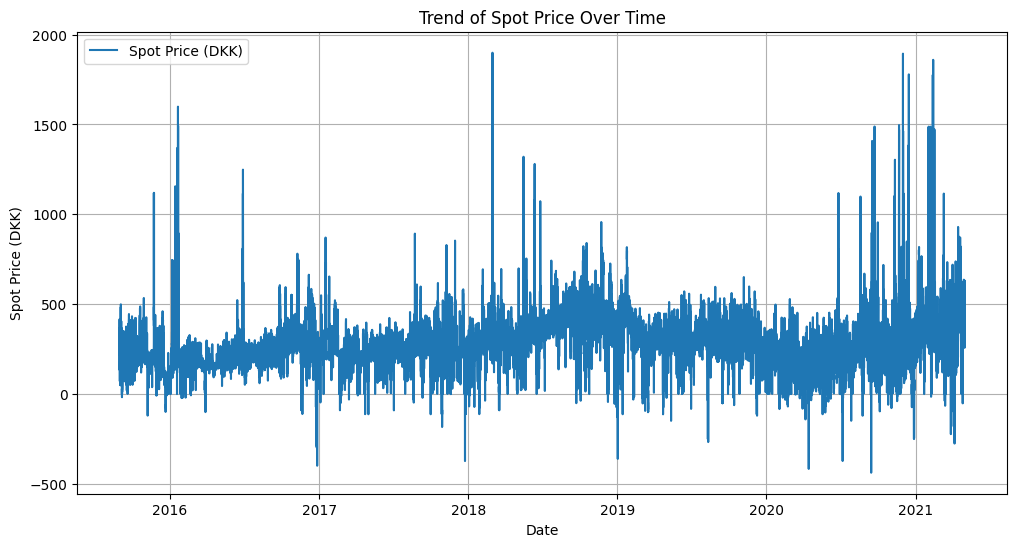

In [14]:
import matplotlib.pyplot as plt

# Plot SpotPriceDKK over time
plt.figure(figsize=(12, 6))
plt.plot(raw_data_1['HourDK'], raw_data_1['SpotPriceDKK'], label='Spot Price (DKK)')
plt.xlabel('Date')
plt.ylabel('Spot Price (DKK)')
plt.title('Trend of Spot Price Over Time')
plt.legend()
plt.grid()
plt.show()

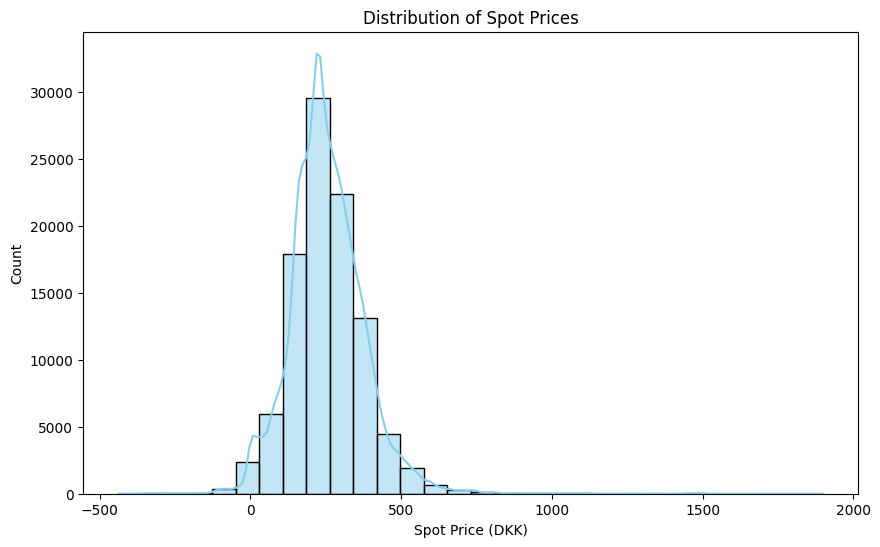

In [19]:
import seaborn as sns

# Histogram of Spot Prices
plt.figure(figsize=(10, 6))
sns.histplot(raw_data_1['SpotPriceDKK'], kde=True, bins=30, color='skyblue')
plt.xlabel('Spot Price (DKK)')
plt.title('Distribution of Spot Prices')
plt.show()

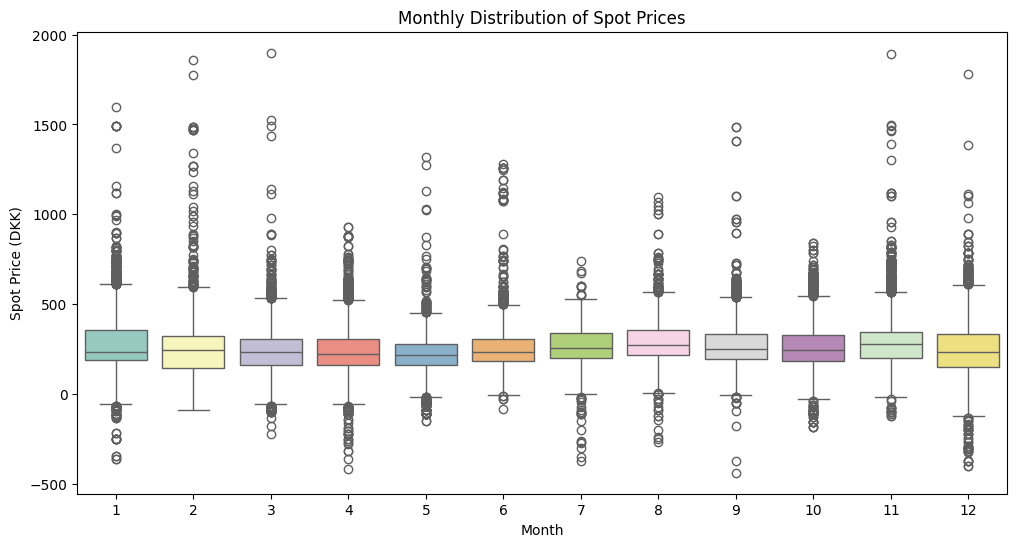

In [20]:
# Box Plot of Spot Prices by Month

raw_data_1['Month'] = raw_data_1['HourDK'].dt.month

plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='SpotPriceDKK', data=raw_data_1, palette="Set3")
plt.xlabel('Month')
plt.ylabel('Spot Price (DKK)')
plt.title('Monthly Distribution of Spot Prices')
plt.show()

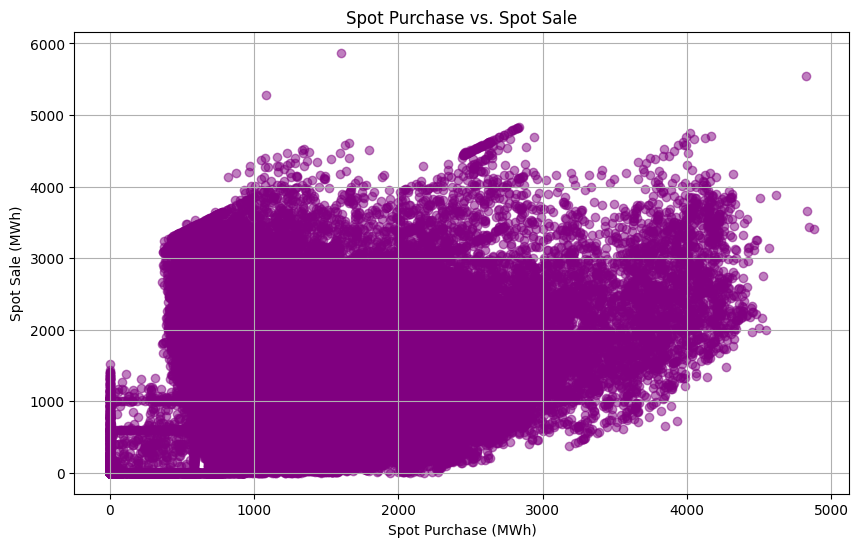

In [21]:
# Scatter Plot for Spot Purchases vs. Spot Sales
plt.figure(figsize=(10, 6))
plt.scatter(raw_data_1['SpotPurchase'], raw_data_1['SpotSale'], alpha=0.5, color='purple')
plt.xlabel('Spot Purchase (MWh)')
plt.ylabel('Spot Sale (MWh)')
plt.title('Spot Purchase vs. Spot Sale')
plt.grid()
plt.show()

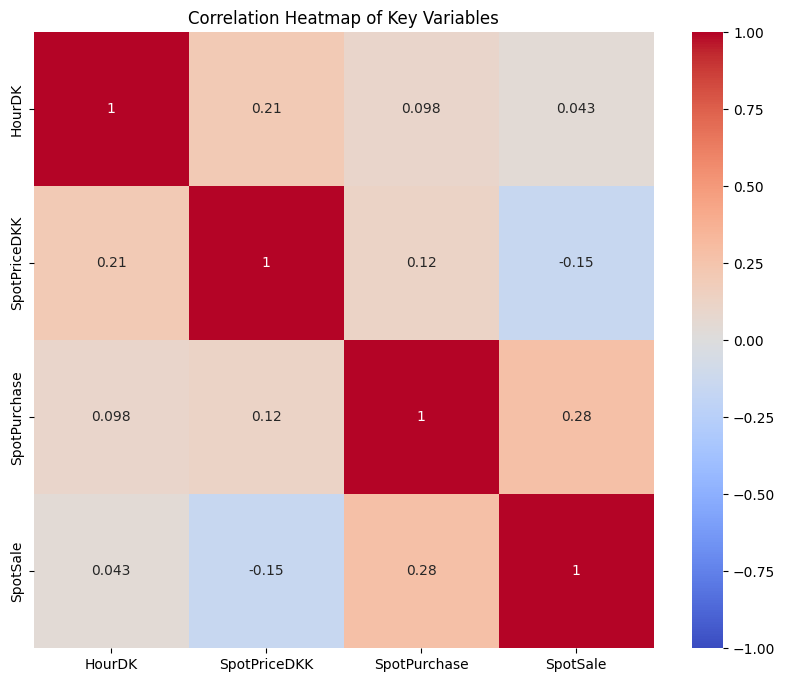

In [23]:
# Heatmap for Correlation Between Numerical Variables
plt.figure(figsize=(10, 8))
correlation = raw_data_1[['HourDK', 'SpotPriceDKK', 'SpotPurchase', 'SpotSale']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Key Variables')
plt.show()

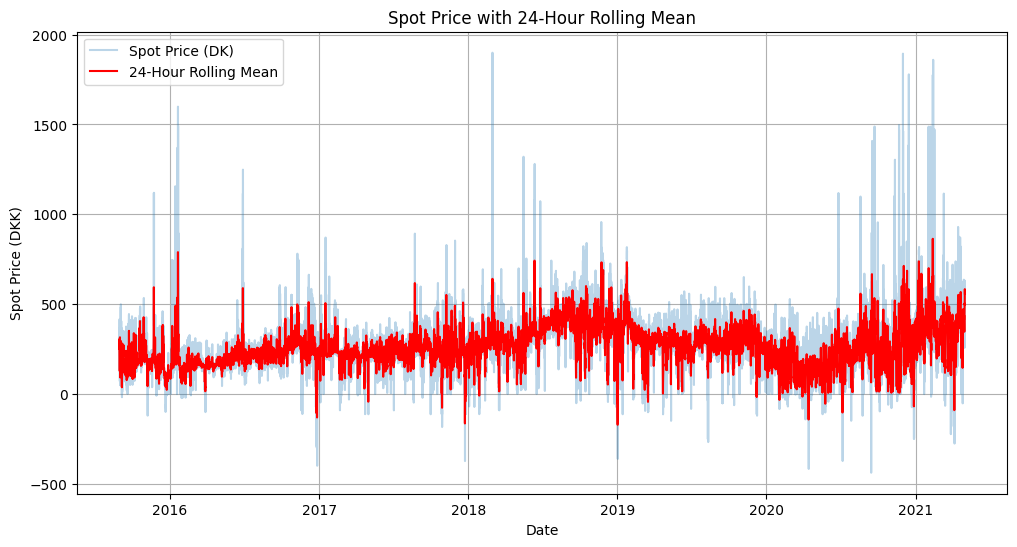

In [27]:
# Rolling Mean Plot for Price (to Smooth the Trend)

raw_data_1['RollingMeanPrice'] = raw_data_1['SpotPriceDKK'].rolling(window=24, min_periods=1).mean()  # Adjust window size as needed

plt.figure(figsize=(12, 6))
plt.plot(raw_data_1['HourDK'], raw_data_1['SpotPriceDKK'], alpha=0.3, label='Spot Price (DK)')
plt.plot(raw_data_1['HourDK'], raw_data_1['RollingMeanPrice'], color='red', label='24-Hour Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Spot Price (DKK)')
plt.title('Spot Price with 24-Hour Rolling Mean')
plt.legend()
plt.grid()
plt.show()

**3-3- Setting up the forcasting model**<br>
We will use ARIMA, SARIMA and Simple Linear Regression model to forcast the SpotPriceDKK.

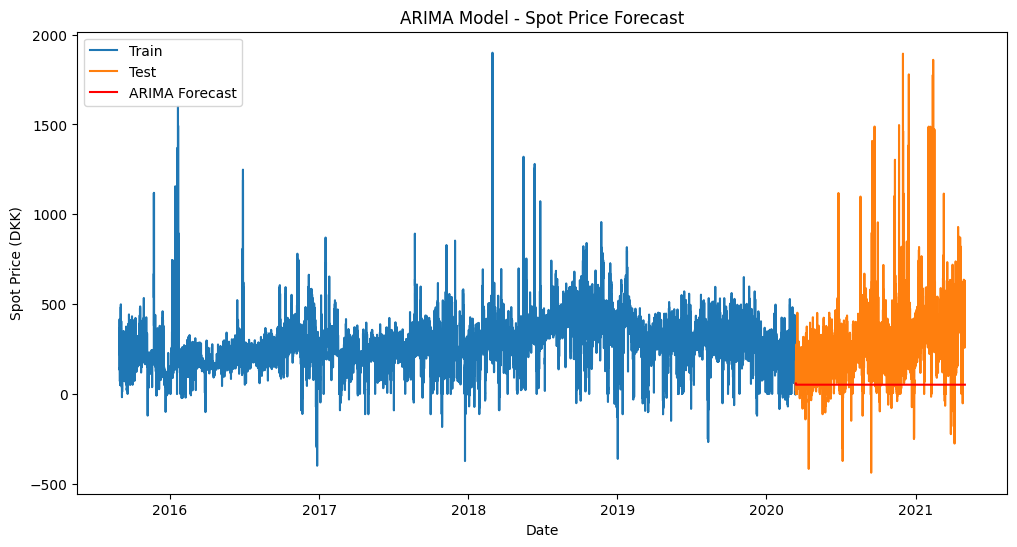

In [42]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA


# Convert to datetime and set index
# raw_data_1['HourDK'] = pd.to_datetime(raw_data_1['HourDK'])
# raw_data_1.set_index('HourDK', inplace=True)

# Sort the data by time to ensure proper order
raw_data_1 = raw_data_1.sort_index()

# Define the training and testing period
train_size = int(len(raw_data_1) * 0.8)
train, test = raw_data_1['SpotPriceDKK'][:train_size], raw_data_1['SpotPriceDKK'][train_size:]



# Fit ARIMA model
arima_order = (5, 1, 0)  # You may need to tune the parameters (p, d, q)
arima_model = ARIMA(train, order=arima_order)
arima_model_fit = arima_model.fit()

# Forecast and evaluate
arima_forecast = arima_model_fit.forecast(steps=len(test))


# Plot the train, test and forcast values
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Spot Price (DKK)')
plt.title('ARIMA Model - Spot Price Forecast')
plt.legend()
plt.show()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.29764D+00    |proj g|=  9.32098D-02


 This problem is unconstrained.



At iterate    5    f=  5.21821D+00    |proj g|=  2.01625D-02

At iterate   10    f=  5.19676D+00    |proj g|=  2.89611D-02

At iterate   15    f=  5.14332D+00    |proj g|=  1.98194D-02

At iterate   20    f=  5.14307D+00    |proj g|=  4.32872D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     23      1     0     0   4.329D-06   5.143D+00
  F =   5.1430687145478968     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


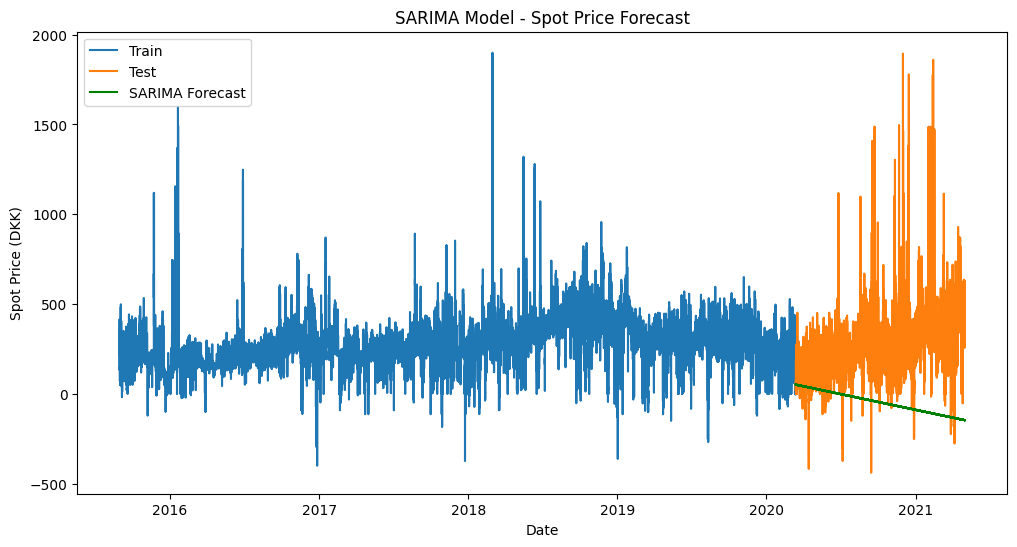

In [72]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define seasonal order (for example, weekly seasonality)
seasonal_order = (1, 1, 1, 4)  # You may need to tune the parameters

# Fit SARIMA model
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=seasonal_order)
sarima_model_fit = sarima_model.fit()

# Forecast and evaluate
sarima_forecast = sarima_model_fit.forecast(steps=len(test)) #, method= 'nm')

# Plot the train, test and forcast values
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, sarima_forecast, label='SARIMA Forecast', color='green')
plt.xlabel('Date')
plt.ylabel('Spot Price (DKK)')
plt.title('SARIMA Model - Spot Price Forecast')
plt.legend()
plt.show()


Linear Regression RMSE: 67.06351593791943


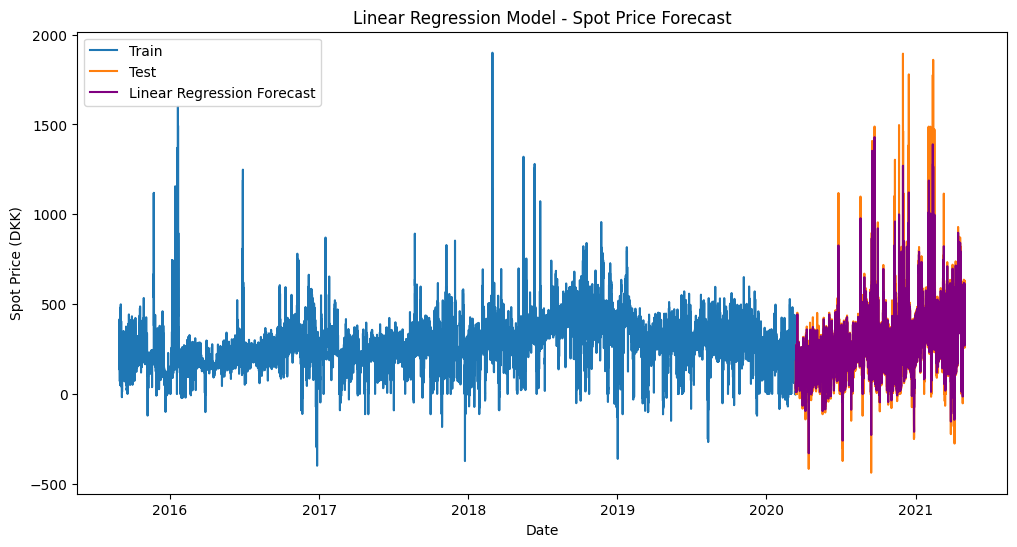

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create lagged features
raw_data_1['Lag_1'] = raw_data_1['SpotPriceDKK'].shift(1)
raw_data_1['Lag_2'] = raw_data_1['SpotPriceDKK'].shift(2)
raw_data_1.dropna(inplace=True)

# Split into train and test sets
train_lag, test_lag = raw_data_1.iloc[:train_size], raw_data_1.iloc[train_size:]

# Define the features and target
X_train, y_train = train_lag[['Lag_1', 'Lag_2']], train_lag['SpotPriceDKK']
X_test, y_test = test_lag[['Lag_1', 'Lag_2']], test_lag['SpotPriceDKK']

# Fit Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Forecast
lr_forecast = lr_model.predict(X_test)

# Calculate RMSE
lr_rmse = mean_squared_error(y_test, lr_forecast, squared=False)
print(f"Linear Regression RMSE: {lr_rmse}")

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train_lag.index, train_lag['SpotPriceDKK'], label='Train')
plt.plot(test_lag.index, test_lag['SpotPriceDKK'], label='Test')
plt.plot(test_lag.index, lr_forecast, label='Linear Regression Forecast', color='purple')
plt.xlabel('Date')
plt.ylabel('Spot Price (DKK)')
plt.title('Linear Regression Model - Spot Price Forecast')
plt.legend()
plt.show()


In [74]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate errors for each model
arima_rmse = mean_squared_error(test, arima_forecast, squared=False)
sarima_rmse = mean_squared_error(test, sarima_forecast, squared=False)
lr_rmse = mean_squared_error(y_test, lr_forecast, squared=False)

print(f"ARIMA RMSE: {arima_rmse}")
print(f"SARIMA RMSE: {sarima_rmse}")
print(f"Linear Regression RMSE: {lr_rmse}")


ARIMA RMSE: 258.6141121210942
SARIMA RMSE: 357.93460403667495
Linear Regression RMSE: 67.06351593791943


In [86]:
# Create a new MLflow Experiment for Linear Regression Model
mlflow.set_experiment("Linear Regression Model")

# Start an MLflow run
with mlflow.start_run():
    # Log the hyperparameters
    # mlflow.log_params(params)

    # Log the loss metric
    mlflow.log_metric("lr_rmse", lr_rmse)

    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("Training Info", "Basic Linear Regression model for SpotPriceDK")

    # Infer the model signature
    signature = infer_signature(X_train, lr_model.predict(X_train))

    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model=lr_model,
        artifact_path="SpotPriceDK",
        signature=signature,
        input_example=X_train,
        registered_model_name="Tracking SpotPriceDK (Linear Regression)",
    )

Successfully registered model 'Tracking SpotPriceDK (Linear Regression)'.
2024/10/29 15:10:14 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Tracking SpotPriceDK (Linear Regression), version 1
Created version '1' of model 'Tracking SpotPriceDK (Linear Regression)'.


2024/10/29 15:10:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run shivering-fawn-920 at: http://127.0.0.1:8080/#/experiments/896544082591657446/runs/df443e68f72b4bf187dfbf9cdff5b6ea.
2024/10/29 15:10:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:8080/#/experiments/896544082591657446.


In [87]:
mlflow.set_experiment("ARIMA Model")

# Start an MLflow run
with mlflow.start_run():
    # Log the hyperparameters
    mlflow.log_param('arima_order', arima_order)

    # Log the loss metric
    mlflow.log_metric("arima_rmse", arima_rmse)

    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("Training Info", "Basic ARIMA model for SpotPriceDK")

    # Infer the model signature
    signature = infer_signature(train, arima_model_fit.forecast(steps=len(test)))

    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model=arima_model,
        artifact_path="SpotPriceDK",
        signature=signature,
        input_example=train.to_frame(),
        registered_model_name="Tracking SpotPriceDK (ARIMA)",
    )


Successfully registered model 'Tracking SpotPriceDK (ARIMA)'.
2024/10/29 15:10:21 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Tracking SpotPriceDK (ARIMA), version 1
Created version '1' of model 'Tracking SpotPriceDK (ARIMA)'.


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)

2024/10/29 15:10:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run selective-ox-517 at: http://127.0.0.1:8080/#/experiments/553406220146805487/runs/529d5a49852d4779a925a6ce86b3a13c.
2024/10/29 15:10:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:8080/#/experiments/553406220146805487.


In [88]:
mlflow.set_experiment("SARIMA Model")

# Start an MLflow run
with mlflow.start_run():
    # Log the hyperparameters
    mlflow.log_param('seasonal_order', seasonal_order)

    # Log the loss metric
    mlflow.log_metric("sarima_rmse", sarima_rmse)

    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("Training Info", "Sample SARIMA model for SpotPriceDK")

    # Infer the model signature
    signature = infer_signature(train, sarima_model_fit.forecast(steps=len(test)))

    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model=sarima_model,
        artifact_path="SpotPriceDK",
        signature=signature,
        input_example=train.to_frame(),
        registered_model_name="Tracking SpotPriceDK (SARIMA)",
    )


Successfully registered model 'Tracking SpotPriceDK (SARIMA)'.
2024/10/29 15:10:33 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Tracking SpotPriceDK (SARIMA), version 1
Created version '1' of model 'Tracking SpotPriceDK (SARIMA)'.


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)

2024/10/29 15:10:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run adventurous-moth-72 at: http://127.0.0.1:8080/#/experiments/490843805283547440/runs/f7cb06126b444545a28f1c063095f874.
2024/10/29 15:10:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:8080/#/experiments/490843805283547440.
